# Calculate the time lag of two time series using autocorrelation

Let's do this with a toy example. 

The workflow is as follows: 

- Calculate the autocorrelation of the two time series. Mathematically, this means a convolution. Numerically, it is an array of suitable size. This is just leaving one time series (=vector) fixed, move the other and calculate some correlation measure of the vectors where they intersect. 

- The maximum lag is the maximum of that vector/function.

This idea could be modified if needed, for instance by using different correlation products. Let's try the "normal" version first and see if we are able to detect something.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return np.sin(x)

In [3]:
x = np.linspace(0,10,11)
y1 = f(x)
y2 = f(x+1)

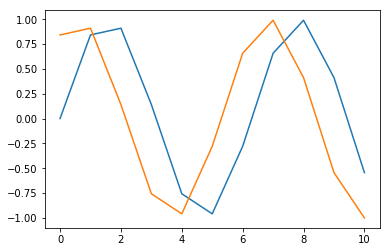

In [4]:
plt.plot(x,y1)
plt.plot(x,y2)

So now we see two toy time series above, with varying lags.

In [5]:
conv = np.correlate(y1.ravel(),y2.ravel(), mode='full') # Calculate the cross-correlation vector

In [6]:
idxs = np.arange(-x.shape[0]+1,x.shape[0]) # Create idxs centered around data. This is for the plot only.

In [7]:
np.argmax(conv) # index of the maximum value. 
lag = np.argmax(conv)-x.shape[0]+1 # Find the optimal lag. Note that argmax will only give you one value!

Text(0,0.5,'Correlation')

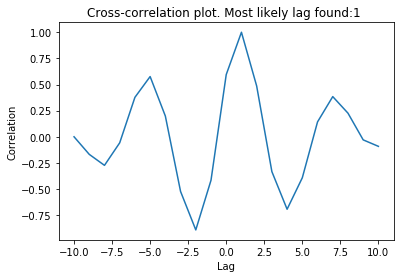

In [8]:
plt.plot(idxs,conv/np.max(conv))
plt.title("Cross-correlation plot. Most likely lag found:{} ".format(lag))
plt.xlabel("Lag")
plt.ylabel("Correlation")